In [ ]:
import os

def rename_files(folder_path, new_names):
    # Ensure the folder path exists
    if not os.path.isdir(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return

    # Iterate through the files and rename them
    for i, new_name in enumerate(new_names):
        old_name = os.path.join(folder_path, f'chunk{i+1}.wav')
        new_name_with_ext = os.path.join(folder_path, f'{new_name}.wav')

        if os.path.isfile(old_name):
            os.rename(old_name, new_name_with_ext)
            print(f'Renamed {old_name} to {new_name_with_ext}')
        else:
            print(f'File {old_name} does not exist.')

# List of new names
alphabet = ['А', 'Ә', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'Җ', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'Ң', 'О', 'Ө', 'П', 'Р', 'С', 'Т', 'У', 'Ү', 'Ф', 'Х', 'Һ', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']

# Folder path
folder_path = '/content/output_chunks'

# Rename files
rename_files(folder_path, alphabet)


Renamed /content/output_chunks/chunk1.wav to /content/output_chunks/А.wav
Renamed /content/output_chunks/chunk2.wav to /content/output_chunks/Ә.wav
Renamed /content/output_chunks/chunk3.wav to /content/output_chunks/Б.wav
Renamed /content/output_chunks/chunk4.wav to /content/output_chunks/В.wav
Renamed /content/output_chunks/chunk5.wav to /content/output_chunks/Г.wav
Renamed /content/output_chunks/chunk6.wav to /content/output_chunks/Д.wav
Renamed /content/output_chunks/chunk7.wav to /content/output_chunks/Е.wav
Renamed /content/output_chunks/chunk8.wav to /content/output_chunks/Ё.wav
Renamed /content/output_chunks/chunk9.wav to /content/output_chunks/Ж.wav
Renamed /content/output_chunks/chunk10.wav to /content/output_chunks/Җ.wav
Renamed /content/output_chunks/chunk11.wav to /content/output_chunks/З.wav
Renamed /content/output_chunks/chunk12.wav to /content/output_chunks/И.wav
Renamed /content/output_chunks/chunk13.wav to /content/output_chunks/Й.wav
Renamed /content/output_chunks/chu

In [ ]:
import shutil
import os

def zip_folder(folder_path, output_path):
    # Ensure the folder path exists
    if not os.path.isdir(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return

    # Create a zip file
    shutil.make_archive(output_path, 'zip', folder_path)
    print(f"Folder {folder_path} has been zipped into {output_path}.zip")

# Example usage
folder_to_zip = '/content/output_chunks'  # Replace with your folder path
output_zip_path = '/content/soo'  # Replace with your desired output path without '.zip' extension

zip_folder(folder_to_zip, output_zip_path)

Folder /content/output_chunks has been zipped into /content/soo.zip


In [ ]:
!pip install librosa

In [170]:
import os
import pandas as pd
import librosa
import numpy as np
import scipy.stats
from scipy.stats import skew
def extract_audio_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Spectral Features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    print(mfccs.shape)
    mfccs_mean = np.mean(mfccs, axis=1)
    print(mfccs_mean.shape)
    mfccs_std = np.std(mfccs, axis=1)
    print(mfccs_std.shape)
    mfccs_skew = skew(mfccs, axis = 1)
    print(mfccs_skew.shape)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_mean = np.mean(mel_spec, axis=1)

    # Temporal Features
    zero_crossings = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossings)
    energy = np.sum(np.square(y))
    rms_energy = np.mean(librosa.feature.rms(y=y))

    # Statistical Features
    mean = np.mean(y)
    variance = np.var(y)
    skewness = scipy.stats.skew(y)
    kurtosis = scipy.stats.kurtosis(y)

    # Prosodic Features
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch = pitches[magnitudes > np.median(magnitudes)]
    pitch_mean = np.mean(pitch) if len(pitch) > 0 else 0
    pitch_std = np.std(pitch) if len(pitch) > 0 else 0
    intensity = np.max(magnitudes)

    features = {
        'mfccs_mean': mfccs_mean,
        'mfccs_std': mfccs_std,
        'mfccs_skew': mfccs_skew,
        'chroma_mean': chroma_mean,
        'mel_spec_mean': mel_spec_mean,
        'zero_crossing_rate_mean': zero_crossing_rate_mean,
        'energy': energy,
        'rms_energy': rms_energy,
        'mean': mean,
        'variance': variance,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'pitch_mean': pitch_mean,
        'pitch_std': pitch_std,
        'intensity': intensity
    }

    return features

def extract_features_from_folder(folder_path):
    data = []

    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder_path, file_name)
            features = extract_audio_features(file_path)

            # Flatten the feature dictionary for DataFrame
            flattened_features = {}
            for key, value in features.items():
                if isinstance(value, np.ndarray):
                    for i, val in enumerate(value):
                        flattened_features[f"{key}_{i}"] = val
                else:
                    flattened_features[key] = value

            flattened_features['file_name'] = file_name
            data.append(flattened_features)

    # Create DataFrame from the list of feature dictionaries
    df = pd.DataFrame(data)
    return df

# Folder path
folder_path = '/content/3chars'

# Extract features and create DataFrame
df = extract_features_from_folder(folder_path)

# Display the DataFrame
print(df.head())

# Save DataFrame to a CSV file
df.to_csv('audio_features.csv', index=False)

(13, 22)
(13,)
(13,)
(13,)
(13, 49)
(13,)
(13,)
(13,)
(13, 27)
(13,)
(13,)
(13,)
   mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  mfccs_mean_4  \
0   -360.825226    108.129059      8.752660     25.841497     30.753223   
1   -401.012878     74.510757     16.276466     23.282059     20.132399   
2   -367.501923     84.240524     -4.143837     35.113316     18.689034   

   mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  mfccs_mean_8  mfccs_mean_9  ...  \
0     13.018274      0.134441     -1.336746    -10.732080     -0.275431  ...   
1      8.666566      1.031117     -0.147779     -9.587281      4.083038  ...   
2     14.141103     -4.207798     -6.509987     -8.873506      5.815172  ...   

       energy  rms_energy      mean  variance  skewness   kurtosis  \
0   98.550194    0.067697 -0.000063  0.008953  1.390301  15.092292   
1  280.007568    0.055804 -0.000201  0.011393  1.062403  18.478807   
2  130.092575    0.061674 -0.000145  0.009588  1.846902  18.035772   

    pitch_mean  

In [171]:
df.shape

(3, 190)

In [172]:
import pandas as pd

df = pd.read_csv('/content/audio_features.csv')
# df =
df.head(5)

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity,file_name
0,-360.82523,108.129060,8.752660,25.841497,30.753223,13.018274,0.134441,-1.336746,-10.732079,-0.275431,...,98.55019,0.067697,-0.000063,0.008953,1.390301,15.092292,1114.4895,976.59326,66.363620,almaz_М.wav
1,-401.01288,74.510760,16.276466,23.282059,20.132399,8.666566,1.031117,-0.147779,-9.587281,4.083038,...,280.00757,0.055804,-0.000201,0.011393,1.062403,18.478807,1207.9740,976.36870,120.323845,almaz_Ё.wav
2,-367.50192,84.240524,-4.143838,35.113316,18.689034,14.141103,-4.207797,-6.509987,-8.873506,5.815172,...,130.09258,0.061674,-0.000145,0.009588,1.846902,18.035772,1329.5062,981.49960,83.682724,almaz_Ж.wav


In [173]:
df

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity,file_name
0,-360.82523,108.129060,8.752660,25.841497,30.753223,13.018274,0.134441,-1.336746,-10.732079,-0.275431,...,98.55019,0.067697,-0.000063,0.008953,1.390301,15.092292,1114.4895,976.59326,66.363620,almaz_М.wav
1,-401.01288,74.510760,16.276466,23.282059,20.132399,8.666566,1.031117,-0.147779,-9.587281,4.083038,...,280.00757,0.055804,-0.000201,0.011393,1.062403,18.478807,1207.9740,976.36870,120.323845,almaz_Ё.wav
2,-367.50192,84.240524,-4.143838,35.113316,18.689034,14.141103,-4.207797,-6.509987,-8.873506,5.815172,...,130.09258,0.061674,-0.000145,0.009588,1.846902,18.035772,1329.5062,981.49960,83.682724,almaz_Ж.wav


In [174]:
df.describe()

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,zero_crossing_rate_mean,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,-376.446677,88.960115,6.961763,28.078957,23.191552,11.941981,-1.014080,-2.664837,-9.730956,3.207593,...,0.104160,169.550113,0.061725,-0.000136,0.009978,1.433202,17.202290,1217.323233,978.153853,90.123396
std,21.535281,17.298943,10.327279,6.224896,6.588245,2.891616,2.801943,3.382646,0.937580,3.138258,...,0.017741,96.950337,0.005947,0.000070,0.001266,0.394005,1.840690,107.812807,2.899676,27.550647
min,-401.012880,74.510760,-4.143838,23.282059,18.689034,8.666566,-4.207797,-6.509987,-10.732079,-0.275431,...,0.085294,98.550190,0.055804,-0.000201,0.008953,1.062403,15.092292,1114.489500,976.368700,66.363620
25%,-384.257400,79.375642,2.304411,24.561778,19.410716,10.842420,-2.036678,-3.923367,-10.159680,1.903804,...,0.095987,114.321385,0.058739,-0.000173,0.009270,1.226352,16.564032,1161.231750,976.480980,75.023172
50%,-367.501920,84.240524,8.752660,25.841497,20.132399,13.018274,0.134441,-1.336746,-9.587281,4.083038,...,0.106680,130.092580,0.061674,-0.000145,0.009588,1.390301,18.035772,1207.974000,976.593260,83.682724
75%,-364.163575,96.184792,12.514563,30.477407,25.442811,13.579688,0.582779,-0.742262,-9.230394,4.949105,...,0.113593,205.050075,0.064686,-0.000104,0.010491,1.618602,18.257289,1268.740100,979.046430,102.003285
max,-360.825230,108.129060,16.276466,35.113316,30.753223,14.141103,1.031117,-0.147779,-8.873506,5.815172,...,0.120506,280.007570,0.067697,-0.000063,0.011393,1.846902,18.478807,1329.506200,981.499600,120.323845


In [175]:
df_test = df.drop(['file_name'], axis =  1)

In [202]:
from sklearn.preprocessing import StandardScaler
# assume 'df' is your pandas DataFrame
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_test)
# convert the normalized array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [203]:
df_normalized

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity,file_name
0,-1.224745,0.888416,1.357139,0.212388,-0.440219,1.405703,0.455864,0.502025,0.480858,-1.307752,...,-1.302438,-0.896921,1.229987,1.294713,-0.991837,-0.133356,-1.403935,-1.168183,-0.659152,-1.056224
1,0.000000,-1.397118,-1.022997,1.104660,-0.943787,-0.568692,-1.387303,0.893967,0.911344,0.187680,...,1.128442,1.395376,-1.219435,-1.140093,1.368956,-1.152610,0.849359,-0.106207,-0.754001,1.342540
2,1.224745,0.508702,-0.334141,-1.317049,1.384006,-0.837011,0.931439,-1.395992,-1.392202,1.120072,...,0.173996,-0.498455,-0.010552,-0.154619,-0.377119,1.285965,0.554576,1.274390,1.413153,-0.286316


In [204]:
df_test = df_normalized

In [205]:
df_test = df_test.reset_index()

In [206]:
df_test['index'] = df_test['index']%39

In [207]:
df_test

,index,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,...,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity,file_name
0,0,-1.224745,0.888416,1.357139,0.212388,-0.440219,1.405703,0.455864,0.502025,0.480858,...,-1.302438,-0.896921,1.229987,1.294713,-0.991837,-0.133356,-1.403935,-1.168183,-0.659152,-1.056224
1,1,0.000000,-1.397118,-1.022997,1.104660,-0.943787,-0.568692,-1.387303,0.893967,0.911344,...,1.128442,1.395376,-1.219435,-1.140093,1.368956,-1.152610,0.849359,-0.106207,-0.754001,1.342540
2,2,1.224745,0.508702,-0.334141,-1.317049,1.384006,-0.837011,0.931439,-1.395992,-1.392202,...,0.173996,-0.498455,-0.010552,-0.154619,-0.377119,1.285965,0.554576,1.274390,1.413153,-0.286316


In [240]:
X = df_test.drop(['index', 'file_name'], axis = 1)


In [241]:
X

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,zero_crossing_rate_mean,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity
0,-1.224745,0.888416,1.357139,0.212388,-0.440219,1.405703,0.455864,0.502025,0.480858,-1.307752,...,-0.720433,-1.302438,-0.896921,1.229987,1.294713,-0.991837,-0.133356,-1.403935,-1.168183,-0.659152
1,0.000000,-1.397118,-1.022997,1.104660,-0.943787,-0.568692,-1.387303,0.893967,0.911344,0.187680,...,1.414129,1.128442,1.395376,-1.219435,-1.140093,1.368956,-1.152610,0.849359,-0.106207,-0.754001
2,1.224745,0.508702,-0.334141,-1.317049,1.384006,-0.837011,0.931439,-1.395992,-1.392202,1.120072,...,-0.693696,0.173996,-0.498455,-0.010552,-0.154619,-0.377119,1.285965,0.554576,1.274390,1.413153


In [243]:
X_train2 = pca.fit_transform(X)

In [245]:
X_train2

array([[ -1.68194636,  12.49560503],
       [-11.91624037,  -7.48339389],
       [ 13.59818673,  -5.01221114]])

In [230]:
import math
def euclidean_distance(vector1, vector2):
  return math.sqrt(sum([(a - b) ** 2 for a, b in zip(vector1, vector2)]))

In [246]:
X_test_sample.shape

(1, 2)

In [251]:
X_test_sample =  np.dot(X_test_sample, pca.components_.T)

In [252]:
X_test_sample

array([[0., 0.]])

In [210]:
y = df_test['index']

In [211]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf")
# X = df.drop(['index'], axis = 1)
clf.fit(X[:39], y[:39])

SVC()

In [212]:
features = extract_audio_features('/content/Ч.wav')
flattened_features = {}
data = []


for key, value in features.items():
    if isinstance(value, np.ndarray):
        for i, val in enumerate(value):
            flattened_features[f"{key}_{i}"] = val
    else:
        flattened_features[key] = value

data.append(flattened_features)
X_test_sample = pd.DataFrame(data)

(13, 112)
(13,)
(13,)
(13,)


In [250]:
features = extract_audio_features('/content/yazanwav/e (2).wav')
flattened_features = {}
data = []


for key, value in features.items():
    if isinstance(value, np.ndarray):
        for i, val in enumerate(value):
            flattened_features[f"{key}_{i}"] = val
    else:
        flattened_features[key] = value

data.append(flattened_features)
X_test_sample = pd.DataFrame(data)
print(X_test_sample)
from sklearn.preprocessing import StandardScaler
# assume 'df' is your pandas DataFrame
scaler = StandardScaler()
X_test_sample = scaler.fit_transform(X_test_sample)
# convert the normalized array back to a DataFrame
X_test_sample = pd.DataFrame(X_test_sample, columns=df_test.drop(['index', 'file_name'], axis = 1).columns)

# X_test_sample
# X_test_sample.to_csv('yazan_e.csv', index=False)
# clf.predict(X_test_sample)

(13, 133)
(13,)
(13,)
(13,)
   mfccs_mean_0  mfccs_mean_1  mfccs_mean_2  mfccs_mean_3  mfccs_mean_4  \
0   -451.916992    100.247635    -10.311355     31.995653      6.867708   

   mfccs_mean_5  mfccs_mean_6  mfccs_mean_7  mfccs_mean_8  mfccs_mean_9  ...  \
0      2.093543      8.046224      4.041694        1.6106     11.569041  ...   

   zero_crossing_rate_mean      energy  rms_energy      mean  variance  \
0                 0.040685  120.374817     0.02246 -0.000077  0.001781   

   skewness  kurtosis   pitch_mean    pitch_std  intensity  
0  0.345337  12.64128  1421.114624  1062.948364   73.87072  

[1 rows x 189 columns]


In [197]:
df.iloc[2]

mfccs_mean_0     -367.50192
mfccs_mean_1      84.240524
mfccs_mean_2      -4.143838
mfccs_mean_3      35.113316
mfccs_mean_4      18.689034
                   ...     
kurtosis          18.035772
pitch_mean        1329.5062
pitch_std          981.4996
intensity         83.682724
file_name       almaz_Ж.wav
Name: 2, Length: 190, dtype: object

In [142]:
X_test_sample

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,zero_crossing_rate_mean,energy,rms_energy,mean,variance,skewness,kurtosis,pitch_mean,pitch_std,intensity
0,-352.576782,110.37368,7.115129,18.836113,16.050209,8.9362,3.087878,-12.828361,-11.622784,13.028227,...,0.075114,100.743385,0.068136,-0.000339,0.011574,0.287599,17.483641,992.459534,810.605469,93.679756


In [80]:
features

{'mfccs_mean': array([-555.1601   ,   16.703018 ,  -21.798252 ,   21.72823  ,
          -2.3993144,    4.81677  ,   -9.635459 ,    4.5622907,
          -4.4750133,    3.6588478,   -2.336719 ,    0.6096641,
          -3.99964  ], dtype=float32),
 'mfccs_std': array([203.35101  ,  38.817505 ,  40.74756  ,  38.982906 ,   7.6938825,
          9.81758  ,  18.805525 ,   9.766896 ,   9.396037 ,   8.11254  ,
          8.263349 ,   5.357504 ,   8.124035 ], dtype=float32),
 'mfccs_skew': array([ 1.1624442,  1.4809858, -1.6991421,  1.5853524, -1.097474 ,
         1.9772007, -1.6306368,  2.0439088, -2.0420365,  2.0370164,
        -2.141855 ,  0.962164 , -2.1105907], dtype=float32),
 'chroma_mean': array([0.15626724, 0.12275594, 0.11755686, 0.11926972, 0.14046118,
        0.12963197, 0.15508544, 0.22038576, 0.25885046, 0.27571908,
        0.26097086, 0.21655965], dtype=float32),
 'mel_spec_mean': array([5.8709481e-03, 5.1768846e-03, 2.5702876e-03, 3.3939977e-03,
        2.0230005e-02, 1.8736833e+00

In [20]:
clf.predict(X_test_sample.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([35])

In [244]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.5815457 0.4184543]
[18.15864561 15.40336293]


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# create a standard scaler, pca with the found number of components and logistic regression model
_sc = StandardScaler()
_pca = PCA(0.85)
# _model = LogisticRegression()
_model = svm.SVC(kernel = "rbf")

log_regress_model_pip = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [23]:
# train the model using the PCA components
log_regress_model_pip.fit(X,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.85)), ('regressor', SVC())])

In [24]:
X_train2 = pca.fit_transform(X)

In [25]:
clf.fit(X_train2, y)

SVC()

In [28]:
df.iloc[35]

mfccs_mean_0     -535.022
mfccs_mean_1    40.559357
mfccs_mean_2   -22.054556
mfccs_mean_3     9.591656
mfccs_mean_4    -19.10951
                  ...    
kurtosis        16.482268
pitch_mean      1769.0214
pitch_std       1055.5675
intensity        55.75456
file_name           Х.wav
Name: 35, Length: 190, dtype: object

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

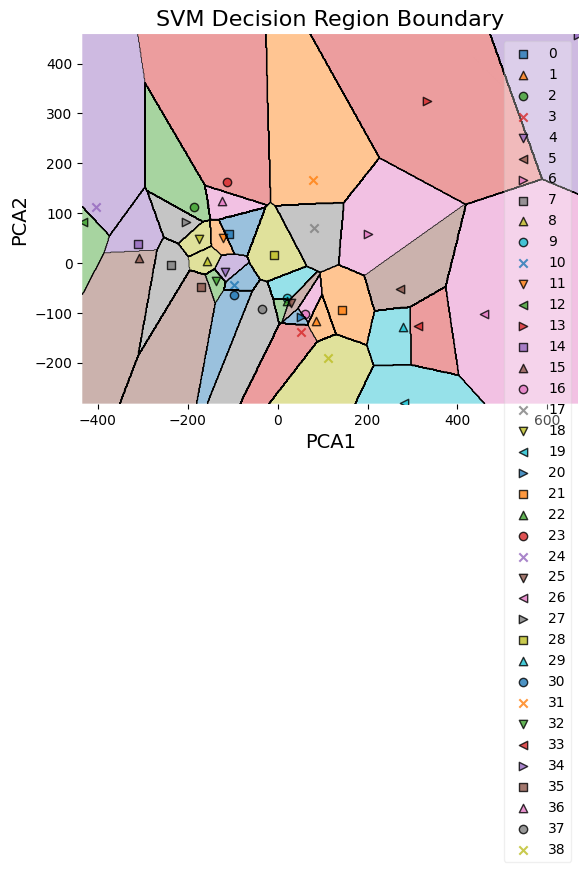

In [27]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train2, y.to_numpy(), clf=clf)

plt.xlabel('PCA1', size=14)
plt.ylabel('PCA2', size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train2, y)


KNeighborsClassifier(n_neighbors=1)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

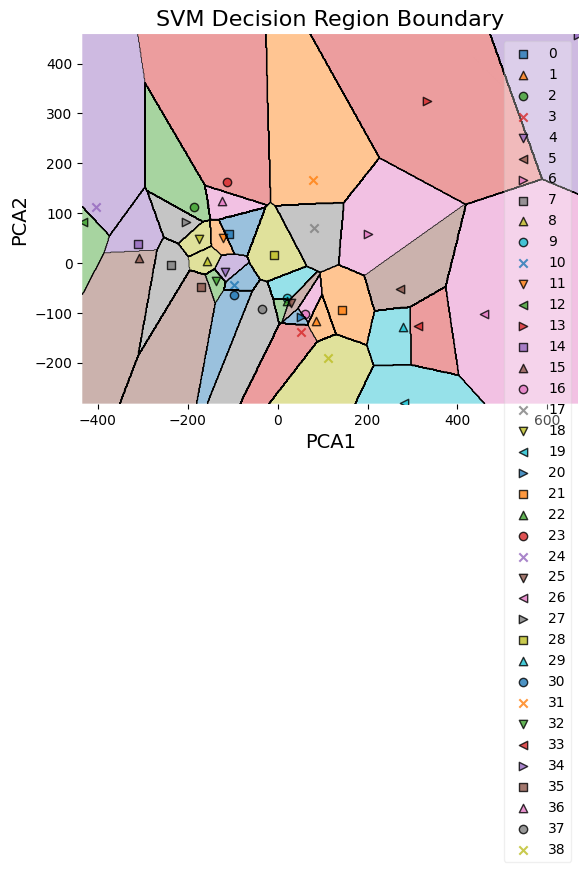

In [33]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train2, y.to_numpy(), clf=neigh)

plt.xlabel('PCA1', size=14)
plt.ylabel('PCA2', size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [81]:
pca_test = np.dot(X_test_sample, pca.components_.T)

In [82]:
pca_test

array([[2209.07878447, -723.89246863]])

In [85]:
clf.predict(pca_test)

array([26])

In [84]:
df.iloc[26]

mfccs_mean_0   -514.14435
mfccs_mean_1    16.949434
mfccs_mean_2   -28.845152
mfccs_mean_3      43.0754
mfccs_mean_4     1.395903
                  ...    
kurtosis        14.103462
pitch_mean      2360.5024
pitch_std       1217.2072
intensity        45.34883
file_name           Җ.wav
Name: 26, Length: 190, dtype: object